# HW4

author: Luis Perez

email: luis0@stanford.edu

## Imports

In [47]:
import numpy as np
from scipy import linalg
import seaborn as sns
import math

## Problem 1: Fitting a model with hourly temperature
### Part (b)

In [5]:
"""Loading y vector of temperatures."""
y = [
    1.244822e+001,
    1.056210e+001,
    1.033174e+001,
    9.606498e+000,
    8.556261e+000,
    9.959871e+000,
    1.077175e+001,
    1.146578e+001,
    1.328712e+001,
    1.496854e+001,
    1.644381e+001,
    1.826723e+001,
    1.856764e+001,
    2.046171e+001,
    1.939858e+001,
    1.930111e+001,
    1.934969e+001,
    1.831423e+001,
    1.766321e+001,
    1.669083e+001,
    1.658678e+001,
    1.498528e+001,
    1.505830e+001,
    1.438545e+001,
    1.197421e+001,
    1.148069e+001,
    1.055407e+001,
    8.324995e+000,
    8.069414e+000,
    9.311587e+000,
    9.640021e+000,
    1.149359e+001,
    1.319649e+001,
    1.490358e+001,
    1.684989e+001,
    1.790743e+001,
    1.912722e+001,
    1.844008e+001,
    1.912928e+001,
    1.883938e+001,
    1.768906e+001,
    1.808924e+001,
    1.686000e+001,
    1.749298e+001,
    1.571663e+001,
    1.559855e+001,
    1.449279e+001,
    1.279592e+001,
    1.091916e+001,
    1.070769e+001,
    9.108555e+000,
    9.117091e+000,
    8.732967e+000,
    9.562628e+000,
    9.827205e+000,
    1.051960e+001,
    1.267284e+001,
    1.373827e+001,
    1.589141e+001,
    1.724662e+001,
    1.823062e+001,
    1.858238e+001,
    1.938788e+001,
    1.768315e+001,
    1.840879e+001,
    1.811321e+001,
    1.745971e+001,
    1.678153e+001,
    1.584773e+001,
    1.538232e+001,
    1.437838e+001,
    1.284104e+001,
    1.152896e+001,
    1.030374e+001,
    8.591905e+000,
    8.409658e+000,
    8.256319e+000,
    8.593017e+000,
    9.973718e+000,
    1.038751e+001,
    1.251709e+001,
    1.436635e+001,
    1.609681e+001,
    1.650109e+001,
    1.806422e+001,
    1.858905e+001,
    1.806650e+001,
    1.798032e+001,
    1.846825e+001,
    1.733324e+001,
    1.702398e+001,
    1.627260e+001,
    1.524704e+001,
    1.450239e+001,
    1.405536e+001,
    1.223471e+001,
    1.185029e+001,
    1.047937e+001,
    8.663015e+000,
    8.139456e+000,
    7.350008e+000,
    7.082453e+000,
    9.494333e+000,
    1.005408e+001,
    1.212076e+001,
    1.383665e+001,
    1.539110e+001,
    1.625036e+001,
    1.724103e+001,
    1.804050e+001,
    1.773624e+001,
    1.758339e+001,
    1.842454e+001,
    1.718926e+001,
    1.598398e+001,
    1.597279e+001,
    1.476660e+001,
    1.387474e+001,
    1.347138e+001,
    1.295600e+001,
    1.129482e+001,
    1.029512e+001,
    8.263162e+000,
    7.816357e+000,
    7.588277e+000,
    7.353837e+000,
    8.119445e+000,
    1.055820e+001,
    1.174310e+001,
    1.317865e+001,
    1.556603e+001,
    1.665215e+001,
    1.700492e+001,
    1.868391e+001,
    1.826153e+001,
    1.863960e+001,
    1.804732e+001,
    1.661052e+001,
    1.573907e+001,
    1.575054e+001,
    1.496028e+001,
    1.392356e+001,
    1.364802e+001,
    1.302191e+001,
    1.075686e+001,
    9.344309e+000,
    8.525904e+000,
    8.181372e+000,
    7.096798e+000,
    7.165355e+000,
    8.526029e+000,
    9.867947e+000,
    1.178932e+001,
    1.301388e+001,
    1.489993e+001,
    1.613176e+001,
    1.727414e+001,
    1.859689e+001,
    1.762994e+001,
    1.704406e+001,
    1.753179e+001,
    1.632080e+001,
    1.622418e+001,
    1.529564e+001,
    1.521687e+001,
    1.444662e+001,
    1.312329e+001,
    1.107770e+001,
]
N = 168

In [6]:
def constructAMatrixFor1b(start:int, end:int):
    """We construct the matrix A as described in the homework assignment.
    
    Args:
        start: The starting timestep. Must be % 24 == 1, >= 1. 
        end: The ending timestep. Must be a multiple of 24
        and must be >= 24.
        
    Returns:
        The matrix A.
    """
    assert start % 24 == 1 and start >= 1
    assert end % 24 == 0 and end >= 24
    identityMat = np.identity(24)
    onesPart = np.concatenate([identityMat.copy() for _ in range(start // 24, end // 24)], axis=0)
    aColumn = np.flip(np.array(range(start, end + 1)))
    aColumn.shape = (aColumn.shape[0], 1)
    return np.append(onesPart, aColumn, axis=1)

In [7]:
A = constructAMatrixFor1b(start=1, end=N)

In [8]:
x = np.dot(np.linalg.inv(np.dot(A.T, A)), np.dot(A.T, np.flip(y)))
yhat = np.flip(np.dot(A, x))

In [9]:
print("The trend parameter is a=%s" % (x[-1]))

The trend parameter is a=-0.012075460503471858


In [10]:
RMSE = np.sqrt(np.sum((y-yhat)**2) / len(yhat))
print("The RMSE on training data is: %s" % (RMSE))

The RMSE on training data is: 0.4050510038014836


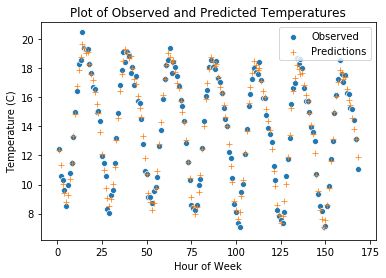

In [11]:
sns.scatterplot(x=range(1,N+1), y=y, label='Observed')
ax = sns.scatterplot(x=range(1,N+1), y=yhat, marker='+', label='Predictions')
ax.set_title('Plot of Observed and Predicted Temperatures')
ax.set(xlabel='Hour of Week', ylabel='Temperature (C)')
ax.get_figure().savefig("temps_on_train")

### Part (c)

In [12]:
# The measured values for the next 24 hours.
ytom = [
    1.092478e+001,
    1.039376e+001,
    8.989078e+000,
    6.891658e+000,
    7.317766e+000,
    7.259584e+000,
    7.909287e+000,
    9.120217e+000,
    1.152908e+001,
    1.293617e+001,
    1.484307e+001,
    1.600680e+001,
    1.692412e+001,
    1.785879e+001,
    1.814252e+001,
    1.862022e+001,
    1.646605e+001,
    1.611008e+001,
    1.657515e+001,
    1.526571e+001,
    1.411094e+001,
    1.418155e+001,
    1.385655e+001,
    1.231481e+001,
]

In [13]:
APred = constructAMatrixFor1b(start=169, end=192)

In [14]:
yhattom = np.flip(np.dot(APred, x))

In [15]:
RMSETest = np.sqrt(np.sum((ytom-yhattom)**2) / len(ytom))
print("The RMSE of the prediction error for tomorrow's temperatures is: %s" % (RMSETest))

The RMSE of the prediction error for tomorrow's temperatures is: 0.6521628280735887


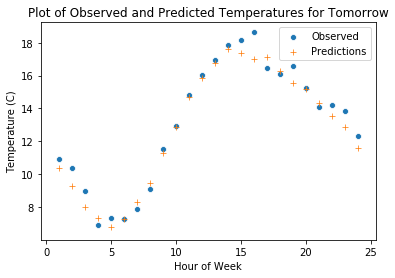

In [16]:
sns.scatterplot(x=range(1,25), y=ytom, label='Observed')
ax = sns.scatterplot(x=range(1,25), y=yhattom, marker='+', label='Predictions')
ax.set_title('Plot of Observed and Predicted Temperatures for Tomorrow')
ax.set(xlabel='Hour of Week', ylabel='Temperature (C)')
ax.get_figure().savefig("temps_on_test")

## Problem 2: Identifying a system from input/output data
### Part (b)

In [17]:
# data for EE263 problem on system identification
n=3
m=10
N=100
X=np.array([
    5.8248,
    3.1342,
    0.3754,
    1.7580,
   -3.4826,
    8.4807,
    0.2953,
    8.9854,
    1.3203,
    4.3584,
   -7.2309,
   -3.5058,
    6.2299,
   -3.1949,
    2.8868,
   -1.8001,
   -0.6779,
   -6.7467,
   -6.3522,
    4.9229,
   -0.2244,
   -3.9947,
   -3.8259,
    4.3087,
   -0.2811,
    2.5674,
    1.9834,
    3.7811,
    2.0024,
   -6.7069,
    1.8752,
    5.6258,
    3.6432,
  -11.8873,
   -1.3689,
   -1.6147,
    1.5899,
   -2.5559,
   -0.0102,
    8.0326,
    4.2382,
    1.3405,
   -4.6174,
   -0.3525,
    0.7395,
   -2.7855,
   -1.6835,
    2.0761,
    7.7891,
  -12.2215,
   -5.4910,
    5.6132,
    2.9083,
   -1.3568,
    2.0710,
   -4.8891,
   -5.1073,
    1.5884,
    7.5805,
    3.7472,
   -2.5385,
    4.4265,
   -1.2405,
   -3.6312,
   -2.2252,
   -3.0646,
   -1.0457,
    2.8107,
   -5.3196,
    1.7579,
    5.6650,
    0.7500,
    3.5157,
   -0.2621,
   10.0925,
    4.6208,
   -9.0706,
    0.1749,
   -9.0393,
    5.1410,
    1.9730,
    3.1970,
    4.3711,
    8.7620,
   -1.6003,
   -0.6871,
    3.0788,
    4.8895,
   -5.5767,
   -2.7501,
    0.1994,
  -12.4142,
    5.7933,
   -5.1314,
    5.7674,
   -3.9323,
    3.1740,
    4.1020,
   -0.8801,
    2.8124,
   -0.6372,
    2.7709,
   -5.4867,
   -3.6565,
    7.0237,
   -3.1011,
    1.1857,
   -7.9342,
   -2.0074,
   -3.8535,
   -1.3134,
    4.8824,
    4.8891,
    5.8501,
    0.7966,
    2.4976,
   -5.2769,
   -2.2537,
    6.3519,
    4.4935,
    2.1935,
   -6.2367,
    1.6233,
    1.9504,
   -2.0257,
    1.4616,
   12.8296,
   -2.2891,
   -8.0541,
  -13.3476,
   -3.7985,
   -3.3736,
   -5.8584,
   10.1647,
    4.8424,
    3.3515,
    2.1007,
  -14.3638,
    8.4294,
    0.1396,
   -4.5102,
  -10.2663,
    0.4454,
   10.4355,
    1.8256,
    4.2305,
   -0.9227,
    5.1536,
   -7.6381,
    4.8247,
    2.6308,
   -0.9223,
    0.9939,
    7.9521,
    0.1610,
    4.4458,
   -6.4958,
    5.9129,
    9.0874,
   -2.9215,
   -5.0534,
   -4.8025,
    3.4558,
   -3.7931,
   -0.4849,
   -7.0347,
    5.1541,
   -3.7994,
    4.3706,
    3.8056,
   -0.8296,
    1.5045,
   -1.6123,
   -1.8421,
    5.7395,
    0.2072,
   -5.4902,
    7.8336,
   -5.2421,
    2.1136,
   -4.2221,
   -1.5581,
    1.9891,
    5.2489,
   -1.7040,
    1.6815,
   -1.1068,
    0.0832,
   -5.9618,
   -0.6582,
    7.4376,
   -4.1841,
   -6.5049,
    7.8707,
    5.8302,
    3.9321,
   -7.3082,
    7.7723,
   -2.9877,
   -6.0528,
   -3.5133,
    1.7821,
    3.2632,
    1.0784,
   -1.3195,
    9.0122,
   -3.2149,
    0.5478,
   -3.5952,
    2.1031,
   -9.6557,
    3.3015,
   -5.5125,
   -0.5149,
   -5.2990,
   -6.1928,
   -9.4462,
   -4.8679,
    1.0606,
    2.4672,
    7.7359,
    3.2247,
  -10.7418,
   -5.1442,
   -0.7079,
  -12.6335,
   -1.5649,
   -2.9681,
    1.6616,
    2.7943,
    4.4994,
   -1.0045,
   -1.1687,
    7.2495,
    9.1807,
   -1.9146,
    0.7754,
   -4.8232,
    0.1938,
    3.8273,
   -2.9726,
    0.6512,
    0.1751,
   -3.1234,
   -2.6989,
    9.3998,
   -5.0192,
   -2.4872,
   -7.5220,
   -0.4772,
    1.9836,
   -2.6356,
    1.7229,
   -3.6165,
    6.3410,
   -0.1562,
    3.8911,
   10.9024,
    2.1891,
    6.6666,
    1.2554,
   -1.5524,
   -4.6150,
   -1.9239,
    5.7909,
    4.3125,
   -5.1735,
   -0.9634,
   -6.4986,
    1.5330,
    4.8450,
   -3.7366,
  -13.9801,
    3.4837,
   16.0345,
    2.6800,
    1.4923,
    1.4202,
    4.7983,
   10.4380,
    7.6234,
   -0.9763,
    0.0863,
    1.2317,
   -4.2724,
    5.7889,
    0.8095,
    7.7853,
   -0.9677,
    8.2565,
   -9.4939,
    9.1126,
   -7.5921,
   -5.2554,
    0.2497,
   -7.2737,
    2.3327,
    2.7272,
    6.6016,
   -2.0225])
X=np.reshape(X,(n,N), order='F')

Y=np.array([
   30.0345,
   22.8095,
   44.8094,
   56.0756,
   56.2002,
   42.7479,
   53.3022,
   64.7067,
   26.2156,
   35.9164,
   28.1879,
  -10.4892,
   71.2742,
   32.0160,
   72.5273,
   67.0702,
   51.7024,
   15.4489,
  -29.2450,
   33.8679,
   49.6661,
   64.3571,
   10.5165,
   46.0675,
   23.6143,
   50.3220,
   75.9194,
   61.8370,
   79.3337,
   82.1494,
  -45.7625,
  -52.3933,
    5.6125,
   -8.6894,
    7.7985,
  -40.4989,
  -56.9415,
  -22.0384,
  -64.3470,
  -78.4266,
    8.1397,
  -19.0188,
   64.3590,
   41.6441,
   75.8355,
   36.5258,
   30.0059,
   39.3254,
  -27.9618,
   -0.1393,
  -41.2597,
  -13.6561,
  -55.7996,
  -38.4113,
  -67.1491,
  -66.7537,
  -69.5111,
  -39.3169,
   -4.9904,
  -55.0985,
   13.4654,
   36.6802,
  -49.2285,
  -27.8074,
  -55.3381,
   -6.8952,
    0.0367,
  -20.5416,
   44.7614,
   29.4258,
   -5.2957,
  -23.9685,
    0.9397,
  -23.2421,
  -12.9130,
    3.4658,
  -11.3018,
  -45.0969,
  -34.7140,
   -3.9510,
   21.6568,
   18.8146,
   11.5414,
   18.6524,
   12.6434,
   28.2068,
   31.1844,
   20.2500,
   21.6577,
   36.5262,
  -15.5867,
   10.5000,
  -19.8380,
    9.3835,
   -8.3324,
  -36.3594,
  -21.5052,
   21.9175,
   16.0932,
  -31.2623,
   50.3955,
   44.1079,
   39.1377,
   49.5880,
   47.1709,
   65.0665,
   78.6850,
   62.8964,
   52.2841,
   75.3249,
  -41.4504,
  -11.7174,
  -92.5243,
  -91.4773,
 -123.0891,
  -67.3832,
  -78.0250,
 -107.8328,
  -13.5776,
  -37.0191,
   -9.7837,
  -17.1545,
   11.4928,
    0.5064,
   11.7335,
   -2.6714,
   -8.1768,
   -5.7565,
  -21.6756,
  -20.1474,
   45.0893,
   29.7866,
   68.0736,
   80.5315,
   84.3078,
   59.9653,
   83.9376,
   95.6181,
   34.2841,
   52.3477,
   -6.5127,
   -3.5389,
  -29.6949,
  -30.0812,
  -39.1238,
  -11.8903,
  -19.7746,
  -40.3075,
   -1.5598,
   -4.0908,
   -4.6359,
   -5.9160,
   -5.4718,
  -18.2769,
  -10.2622,
    3.3884,
  -10.1641,
  -27.5424,
  -16.8714,
   -0.6627,
  -73.4399,
  -90.2879,
   18.5297,
  -14.1298,
   17.7372,
  -68.9569,
  -89.1356,
  -26.5242,
 -108.3701,
 -127.7640,
   15.8105,
   17.1600,
   28.5667,
   44.8296,
   44.0908,
   21.7802,
   36.3409,
   58.7663,
   26.4251,
   18.9353,
  -46.6222,
  -42.0949,
  -19.1020,
  -22.9500,
  -21.0272,
  -59.1512,
  -63.8237,
  -30.5963,
  -43.4888,
  -71.9505,
   61.9001,
   59.2292,
   38.9111,
   54.0701,
   50.1095,
   68.3506,
   88.8696,
   75.2077,
   67.6894,
   87.4858,
   11.6920,
   28.2595,
  -25.3070,
   -5.3128,
  -27.4170,
   -4.8357,
    8.5700,
    0.3038,
   41.7528,
   23.0344,
  -34.7236,
  -20.6072,
  -47.7450,
  -43.2963,
  -55.2976,
  -55.2515,
  -59.9498,
  -52.4430,
  -22.0860,
  -43.5828,
  -15.9823,
   16.3353,
  -45.7119,
  -19.9126,
  -43.2753,
  -43.5170,
  -27.9246,
   -4.6798,
   25.6032,
  -14.1943,
   35.9961,
   39.5620,
   19.9932,
   34.4625,
   32.6274,
   36.8137,
   55.7788,
   49.4435,
   48.6918,
   48.5811,
   58.9997,
    5.3052,
   93.6387,
   63.5379,
   99.7714,
  104.2068,
   96.5440,
   55.4087,
   -1.4447,
   69.9121,
  -36.6042,
  -61.6926,
   33.8437,
   -2.4297,
   36.3181,
  -15.3246,
  -39.2304,
  -16.3327,
  -80.3490,
  -70.2717,
   17.0885,
   35.4870,
  -48.3118,
  -32.9522,
  -60.1390,
    0.3509,
    5.5434,
  -33.1867,
   46.6697,
   45.1707,
   71.7012,
   39.6973,
   85.3064,
   73.9825,
   92.8495,
  109.2652,
  117.0470,
   77.9766,
   40.6882,
  104.6147,
   11.1127,
   -4.3277,
    9.5299,
   -5.3292,
    4.6645,
   20.9069,
   15.0439,
   -3.0515,
   -7.8130,
   16.1613,
  -33.0033,
  -39.0614,
   17.2727,
    0.1613,
   14.4168,
  -27.6633,
  -39.0377,
   -4.7631,
  -51.0720,
  -62.0199,
  -29.3812,
  -81.6184,
   40.3344,
  -25.2426,
   26.7422,
    5.6137,
  -40.8750,
  -54.7390,
 -112.1031,
  -61.7583,
   -3.0080,
   36.7003,
  -61.6589,
  -27.8825,
  -66.4203,
  -34.6783,
  -13.7624,
  -13.9461,
   54.1666,
   10.6131,
   23.3136,
   28.5489,
   15.0299,
   34.9326,
   25.1701,
   21.6111,
   37.7436,
   48.8070,
   37.1013,
   29.8247,
   16.8166,
   -2.5705,
   35.4501,
   29.2786,
   43.3663,
   33.9275,
   33.3896,
   25.7540,
   -8.1185,
   12.9466,
    3.9164,
  -16.2706,
   10.8444,
  -23.6102,
   -0.7154,
   25.5718,
    4.5365,
  -41.3167,
  -35.4549,
   12.1745,
  -40.5664,
    0.7210,
  -79.2005,
  -50.2333,
  -87.0090,
  -82.5078,
  -70.4977,
  -38.1764,
    9.3652,
  -45.0542,
  -30.5394,
  -30.3180,
  -21.6355,
  -37.2945,
  -26.8235,
  -36.8352,
  -48.0043,
  -43.1612,
  -37.5624,
  -40.4677,
   62.9097,
   44.3744,
   72.8049,
   77.1313,
   87.4973,
   90.2484,
  105.0358,
   85.3905,
   42.0512,
   85.7400,
   -6.9430,
   11.4366,
  -31.4765,
   -8.9987,
  -24.7100,
  -35.4818,
  -22.8289,
    2.7313,
   24.1665,
  -15.6631,
   45.5822,
   52.3064,
   14.5131,
   26.0338,
   16.3329,
   57.6050,
   67.5738,
   34.3300,
   58.8460,
   80.9592,
  -17.4596,
  -41.0767,
   27.9593,
   -6.6398,
   24.1645,
   -2.0159,
  -17.0441,
  -18.3125,
  -56.2523,
  -37.2776,
    1.6071,
  -11.4236,
   25.5120,
    9.9778,
   24.4185,
   10.8751,
    9.3382,
    7.7177,
  -19.8777,
   -0.1120,
  -26.3182,
  -24.0470,
   32.0800,
   47.3838,
   58.2209,
  -32.8575,
  -13.7101,
   65.8020,
  -22.0409,
  -62.0769,
  -64.0927,
  -27.8855,
 -115.7689,
 -123.4451,
 -147.8835,
  -96.7453,
 -121.1030,
 -140.1373,
  -34.7044,
  -69.8748,
   62.6606,
   79.4735,
  -10.2865,
   21.0471,
   -6.2489,
   57.6965,
   82.3064,
   27.0893,
   93.1701,
  108.0696,
  -53.2160,
    1.5877,
  -75.8344,
  -28.4099,
  -70.6233,
 -104.7413,
  -83.6591,
   -8.3946,
   17.3508,
  -80.5072,
   -7.3122,
   -0.5994,
   27.9449,
   41.2310,
   44.2158,
   -9.2162,
    7.9930,
   53.5686,
    1.8669,
  -19.9899,
   31.2626,
   14.4400,
    0.3833,
  -29.5827,
  -16.5024,
   56.6367,
   35.2492,
  -49.8159,
    1.6465,
   64.8125,
   20.4416,
   31.1579,
    8.4401,
   22.4997,
   13.0928,
   15.3997,
   33.9661,
   34.5025,
   38.7947,
   31.8401,
   -6.1850,
  -47.4546,
   71.0424,
   24.2324,
   70.6450,
   32.9531,
   14.4727,
    9.9435,
  -68.0921,
  -21.0483,
    2.6713,
   -4.9259,
   28.9047,
   15.1659,
   32.9675,
   11.0467,
   12.9095,
   17.0947,
   -6.5814,
   -0.3828,
   41.3290,
    2.1714,
   85.6146,
   78.5032,
  101.1965,
   76.3969,
   71.8516,
   75.9312,
    1.6621,
   43.1108,
   67.9198,
   54.2256,
   18.3611,
   11.7846,
    8.3532,
   77.1874,
   82.5351,
   10.6808,
   50.6188,
  104.5796,
  -59.1880,
  -39.0473,
  -51.7542,
  -57.3667,
  -64.3455,
  -76.9272,
  -85.8425,
  -68.7928,
  -45.3163,
  -80.4782,
  -17.1335,
  -25.4644,
   23.0309,
    5.9986,
   22.0742,
   -5.0662,
  -11.9204,
   -0.0145,
  -31.6539,
  -29.1468,
   -7.1039,
   31.4884,
  -79.1418,
  -46.0208,
  -86.9609,
  -43.4686,
  -28.1585,
  -34.8760,
   49.5128,
    6.0895,
   20.2758,
   25.7541,
   25.6648,
   44.0991,
   35.3852,
   22.1423,
   43.0807,
   55.6970,
   32.0636,
   30.9640,
  -15.1159,
  -14.1454,
   -1.8788,
   -4.1037,
   -3.0089,
  -14.6308,
  -19.2278,
   -3.6205,
  -16.1608,
  -23.0672,
  -13.4353,
   -2.9453,
   -1.7304,
   18.4511,
   12.6915,
  -28.3076,
  -13.4117,
   30.7483,
    2.6281,
  -28.1082,
   -1.7275,
  -37.0933,
   69.0911,
   40.8564,
   80.6142,
   31.3543,
   22.0494,
   35.7036,
  -44.8708,
  -15.0364,
   -6.2571,
  -11.4921,
  -18.7378,
  -27.9506,
  -24.4681,
   -7.0877,
  -16.0345,
  -34.0047,
  -17.0878,
   -3.2726,
   11.7055,
  -12.7055,
   47.3716,
   35.2881,
   57.8159,
   29.5766,
   31.0579,
   36.3399,
  -16.7498,
    2.2108,
  -27.8963,
   -1.2103,
  -49.9358,
  -31.7937,
  -51.6542,
  -59.4219,
  -54.6824,
  -28.1305,
   -0.9816,
  -43.7909,
   11.5796,
   48.5956,
  -35.2402,
    6.3644,
  -22.7775,
  -11.8035,
   16.8669,
   27.2886,
   63.9977,
   30.2238,
   58.6925,
   62.9066,
   -4.5890,
   13.2554,
  -11.1286,
   57.4430,
   72.5046,
   15.7975,
   69.3191,
   95.4638,
   12.4509,
  -44.3697,
   81.2582,
   29.4997,
   80.5036,
   54.4523,
   32.8922,
    8.6286,
  -66.7209,
    0.5400,
  -54.2910,
  -46.7734,
  -44.0108,
  -63.7209,
  -59.6965,
  -67.6177,
  -83.9505,
  -72.6834,
  -52.7235,
  -77.2701,
   26.9441,
   20.0033,
   18.4644,
   32.2894,
   28.0037,
   24.0101,
   38.1700,
   33.9763,
   26.4998,
   35.6921,
   28.5806,
   57.1259,
  -27.5911,
   16.9243,
  -25.4548,
    3.3368,
   29.3113,
   32.5762,
   81.3877,
   47.9664,
   -8.6576,
  -20.3323,
   17.2915,
    1.7855,
   16.9200,
    6.6580,
   -6.1653,
  -13.3352,
  -30.0380,
  -16.0413,
  -30.7399,
   13.5959,
 -108.2352,
  -75.3430,
 -121.7377,
  -76.3032,
  -69.2534,
  -73.9792,
   29.8265,
  -23.8756,
  -58.9734,
  -42.1953,
  -42.9925,
  -49.3491,
  -46.2152,
  -80.9929,
  -86.9403,
  -52.9740,
  -47.1076,
  -81.7662,
  -40.1184,
  -30.4971,
  -58.0272,
  -78.3599,
  -83.7911,
  -47.8885,
  -73.7415,
 -102.1172,
  -43.6412,
  -40.9852,
   60.4516,
   60.1060,
   38.4056,
   61.9437,
   52.8716,
   72.3071,
   89.4900,
   72.3827,
   67.1543,
   87.9151,
  -52.0599,
  -38.4472,
  -84.5216,
 -100.1725,
 -108.5875,
  -72.0791,
  -93.4510,
 -117.5195,
  -49.2734,
  -57.2467,
  -48.5214,
  -14.3671,
 -105.6084,
 -106.8343,
 -140.5309,
  -84.8864,
  -96.4675,
 -117.8171,
  -13.0890,
  -45.1461,
   35.2198,
   23.5310,
   41.2361,
   41.4263,
   50.9500,
   56.4403,
   62.3292,
   44.2011,
   26.3730,
   55.6508,
   28.4656,
   -1.2991,
   43.8310,
   15.4381,
   45.1062,
   55.6930,
   47.7989,
    7.8597,
  -11.4325,
   40.2775,
   13.3700,
  -13.1879,
   71.6155,
   62.3261,
   83.5256,
   35.2728,
   40.8666,
   61.4905,
  -20.3821,
   -1.7397,
    8.9530,
    5.9674,
   -6.1629,
  -19.9119,
  -19.3939,
   15.8984,
    7.8362,
  -26.0684,
   -0.3118,
   25.4946,
   -2.6031,
    3.1700,
  -21.6090,
  -17.0022,
  -23.9440,
   -8.1492,
   -4.5543,
  -22.7541,
    4.9288,
    5.6407,
   25.6069,
   -8.6838,
   42.0524,
    6.7897,
   34.0521,
   60.1171,
   38.9708,
  -13.1137,
  -20.2872,
   38.7975,
  -58.3532,
  -28.0442,
  -88.9792,
  -77.0757,
  -99.1115,
  -99.8722,
 -104.1693,
  -76.8930,
  -18.4653,
  -80.9568,
   -7.5973,
   10.8947,
  -20.5825,
   -4.3315,
  -19.7231,
  -18.4275,
   -7.3614,
    1.1647,
   17.6685,
   -3.2222,
   17.4864,
  -18.0777,
   59.4788,
   21.8074,
   55.5028,
   48.8294,
   32.5659,
    9.7081,
  -33.3270,
   20.3495,
   76.8817,
   36.1262,
   75.4499,
   53.1863,
   81.6778,
  113.0115,
  112.8016,
   55.9800,
   34.4205,
  111.3170,
   42.0748,
   46.3276,
   26.5391,
   46.9964,
   38.2259,
   46.4896,
   68.5999,
   60.3637,
   63.0347,
   59.1450,
  -37.7391,
  -33.6666,
  -22.7805,
  -37.5021,
  -31.0929,
  -43.0846,
  -54.7786,
  -47.1713,
  -37.3167,
  -51.9746,
    7.6209,
   25.3656,
    7.9536,
   36.8277,
   20.7369,
   -9.8243,
   13.9305,
   56.0811,
   43.1229,
    2.8626,
  -25.6868,
  -43.4062,
    3.3244,
  -25.4199,
   -7.6598,
  -13.5214,
  -37.8497,
  -41.6004,
  -62.2109,
  -39.9368,
  -79.8323,
  -39.4427,
  -66.9803,
  -37.2063,
  -58.4002,
 -121.6920,
 -118.9743,
  -27.1337,
  -32.5871,
 -123.8067,
   99.8435,
  111.3484,
   45.0806,
   98.3647,
   65.0314,
  101.6935,
  153.0044,
  133.4394,
  144.9140,
  149.1755,
   31.0453,
   15.7429,
   42.3167,
   32.7665,
   48.4140,
   51.0556,
   58.4738,
   35.5076,
   12.5736,
   46.6381,
   56.5691,
   54.0382,
   66.7478,
   99.1523,
   94.7357,
   63.9902,
   97.1920,
  129.2111,
   68.5896,
   63.1988,
  -11.5851,
    4.8207,
  -30.0014,
  -12.9515,
  -28.5436,
  -35.7875,
  -26.0215,
   -7.4045,
   10.7344,
  -17.5469,
   52.7121,
   11.0501,
   95.7147,
   79.5129,
  103.9420,
   96.2149,
   95.8613,
   76.2511,
    7.4791,
   62.5669,
   -5.7730,
   49.4028,
  -70.8433,
   -9.0890,
  -69.8875,
  -56.3278,
  -24.1811,
   13.2776,
   73.5341,
   -0.9440,
  -42.5205,
  -57.7422,
   29.0651,
   11.7197,
   38.3672,
  -40.0050,
  -45.4690,
   13.3505,
  -66.1048,
  -91.5841,
  -20.7910,
  -49.4022,
   16.0110,
  -14.3773,
   10.8786,
   -7.5153,
  -33.1469,
  -38.3976,
  -65.6431,
  -42.4488,
   24.1370,
   44.9871,
    2.9564,
   36.7386,
   15.1112,
   14.6533,
   43.7402,
   54.1967,
   58.1558,
   41.7045])
Y=np.reshape(Y,(m,N), order='F')

In [18]:
def solveForA(X, Y):
    """
    X is (n x N)
    Y is (m x N)
    
    We are looking to solve for A, which will be m x n.
    """
    (n, Nx) = X.shape
    (m, N) = Y.shape
    assert Nx == N
    # m x n -- formed from X and Y.
    xMatrix = np.zeros((n, n))
    yMatrix = np.zeros((m,n))
    for i in range(N):
        x = X[:, i]
        y = Y[:, i]
        x.shape = (n, 1)
        y.shape = (m, 1)
        xMatrix += np.dot(x, x.T)
        yMatrix += np.dot(y, x.T)
    assert len(linalg.null_space(xMatrix)[0]) == 0
    xInv = np.linalg.inv(xMatrix)
    return np.dot(yMatrix, xInv)

In [19]:
minimizerA = solveForA(X, Y)

In [20]:
minimizerA

array([[ 2.02992454e+00,  5.02077879e+00,  5.01040266e+00],
       [ 1.14300076e-02,  6.99991043e+00,  1.01061265e+00],
       [ 7.04239020e+00, -2.54352520e-03,  6.94476335e+00],
       [ 6.99765743e+00,  3.97592792e+00,  4.00242122e+00],
       [ 9.01295285e+00,  1.04493868e+00,  6.99800225e+00],
       [ 4.01187599e+00,  3.96488792e+00,  9.02674982e+00],
       [ 4.98710794e+00,  6.97233996e+00,  8.03363399e+00],
       [ 7.94249406e+00,  6.08754514e+00,  3.01735388e+00],
       [ 9.43583486e-03,  8.97218370e+00, -3.85465462e-02],
       [ 1.06123427e+00,  8.02076138e+00,  7.02847693e+00]])

In [21]:
def getRelApproxErr(mat, X, Y):
    (n, N) = X.shape
    error = 0.0
    for i in range(N):
        error += 1 / N * (linalg.norm(np.dot(mat, X[:, i]) - Y[:, i]) / linalg.norm(Y[:, i]))
    return error

In [22]:
print("The relative error is: %s" % (getRelApproxErr(minimizerA, X, Y)))

The relative error is: 0.05814323689487761


## Proble 3: Robus regression using the Huber penalty function
### Part (b)

In [62]:
def huber(x, delta = 1):
    if abs(x) <= delta:
        return 0.5 * x**2
    else:
        return delta * (abs(x) - 0.5 * delta)

In [63]:
N = 25
t = np.array([
	[0.0115],
	[0.3576],
	[0.9111],
	[1.5272],
	[1.7587],
	[1.8866],
	[1.9175],
	[2.4285],
	[2.6906],
	[2.8750],
	[3.2247],
	[3.4112],
	[4.2435],
	[4.6092],
	[4.6245],
	[4.7136],
	[4.7349],
	[6.0739],
	[7.2176],
	[7.3843],
	[7.6550],
	[7.7016],
	[7.8474],
	[9.1599],
	[9.1742],
])
x = np.array([
	[23.5187],
	[0.0000],
	[18.9909],
	[15.7897],
	[14.8507],
	[14.2145],
	[14.0918],
	[11.4933],
	[10.4921],
	[8.8340],
	[7.5857],
	[6.1800],
	[1.9019],
	[0.5615],
	[0.3277],
	[-0.1091],
	[-0.0124],
	[-6.5992],
	[-12.7377],
	[-13.2593],
	[-14.8588],
	[-14.6661],
	[-15.4040],
	[0.0000],
	[-22.2578],
])

In [64]:
# Solve the sytem using least squares.
A = np.concatenate((t, np.ones((N,1))), axis=1)

In [65]:
# Least squares solution is:
paramsLeastSquares = np.dot(np.linalg.inv(np.dot(A.T, A)), np.dot(A.T, x))

In [131]:
def iterativeLeastSquares(A, x, startParams, delta=1,
                          maxIterations=1000,eps=1e-4):
    N, _ = A.shape
    prevParams = startParams
    huberV = np.vectorize(huber)
    for _ in range(maxIterations):
        W = huberV(np.diag((np.dot(A, prevParams) - x).flatten()))
        inverse = np.linalg.inv(np.dot(np.dot(A.T, W), A))
        newParams =  np.dot(inverse, np.dot(np.dot(A.T, W), x))
        huberLoss = np.sum(np.dot(A, newParams) - x)
        if linalg.norm(newParams - prevParams) < eps:
            return newParams, huberLoss
        prevParams = newParams
    return newParams, huberLoss

In [132]:
huberParams, loss = iterativeLeastSquares(A, x, paramsLeastSquares)

In [133]:
paramsLeastSquares

array([[-3.94855818],
       [19.03697567]])

In [134]:
 huberParams

array([[-4.9920376],
       [23.5669247]])

In [135]:
loss

0.40706964531961987

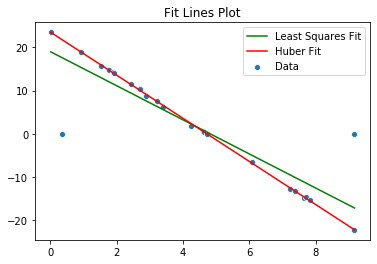

In [121]:
# Plot the data
sns.scatterplot(x=t.flatten(), y=x.flatten(), label="Data")
sns.lineplot(x=t.flatten(), y=np.dot(A, paramsLeastSquares).flatten(), color='green', label='Least Squares Fit')
ax = sns.lineplot(x=t.flatten(), y=np.dot(A, huberParams).flatten(), color='red', label='Huber Fit')
ax.set_title('Fit Lines Plot')
ax.get_figure().savefig('line_plots_for_huber_fit')